<a href="https://colab.research.google.com/github/kgosal2001/Data_analytics/blob/main/KaranvirGosalHW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
<p style="color:red"> Logistic Regression: </p>
    <p style="color:red"> HW6 starts towards the end of this Notebook</p>
</h1>

## Data Description

#### Purpose: To predict the onset of diabetes based on diagnostic measures.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
pima = pd.read_csv("./desktop/data/diabetes.csv")

In [ ]:
# See first few rows of the loaded data frame
pima.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
pima.shape

(768, 9)

In [ ]:
pima.size

6912

In [ ]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Check for any null values in the dataset

In [ ]:
# Running the following code shows there are no null values
pima.isnull().values.any()

False

<AxesSubplot:>

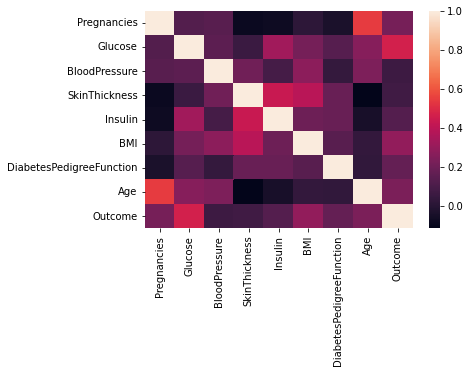

In [ ]:
# Generate a heatmap of correlations between variables
# Lighter colors show high corlations; darker colors indicate low correlations
sns.heatmap(pima.corr())

In [ ]:
# Look at the actual correlation coefficients
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

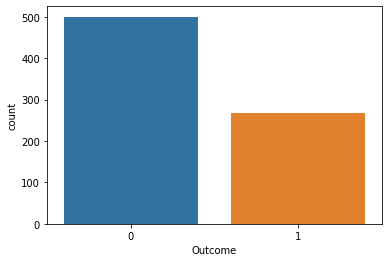

In [ ]:
# Visually compare ratios of people with no diabetes (0) and with diabetes (1)
sns.countplot(x='Outcome', data=pima)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

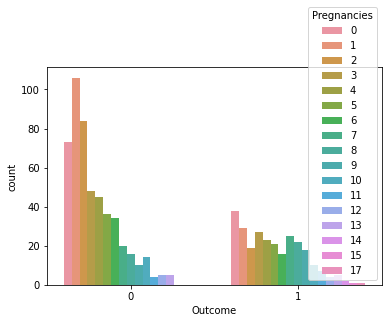

In [ ]:
# Visually compare ratios of people with no diabetes (0) and with diabetes (1)
sns.countplot(x='Outcome', data=pima, hue='Pregnancies')

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

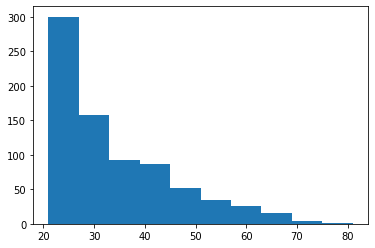

In [ ]:
# Histogram
plt.hist(pima['Age'])

/Users/ashrafshirani/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

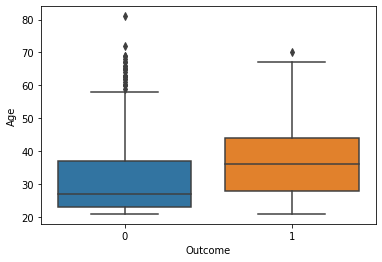

In [ ]:
# Create a box plot
sns.boxplot(pima['Outcome'], pima['Age'])

### Box plot to explore relevant features of the data
As you can see, (1) the people with no diabestes (with a Outcome value of 0) tend to be younger  while the those who have diabestes tend to be older. (2) There are many ouliers in the case of people with no diabetes, i.e., many older people don't have diabetes. (3) Median age of people with diabetes is higher.

<h1><p style="color:blue"> Logistic Regression Analysis Code Starts Here </p></h3> </p>

## (a) Create separate data frames for explanatory and target variables

In [ ]:
# Create a list of explanatory variables
# Notice that one of the variables "SkinThickness" is dropped in this example
# Subject area or domain knowledge is necessary to decide which variables are most relevant
# for analysis. Also, a low correlation between this variable and the outcome variable is another factor

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a data frame x for expalanatory variables and data frame y for target variable
X = pima[features] # Features
y = pima.Outcome

## (b) Split dataset into training and testing subsets

In [ ]:
from sklearn.model_selection import train_test_split

'''
The random_state argument:  If we don't specify the random_state,
every time we run the code, new random values will be generated and the
train and test datasets would have different values each time.
However, if a fixed value is assigned like random_state = 99
then no matter how many times you execute your code the result would be the same
i.e, same values generated for train and test datasets. '''

# Split the dataset for taining and testing using 75% and 25% split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

In [ ]:
# Look at the shape of training data subsets
x_train.shape, y_train.shape

((576, 7), (576,))

In [ ]:
# Look at the shape of test data subsets
x_test.shape, y_test.shape

((192, 7), (192,))

## (c) Fit

In [ ]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
36,11,138,76,0,33.2,0.420,35
520,2,68,70,66,25.0,0.187,25
275,2,100,70,57,40.5,0.677,25
729,2,92,52,0,30.1,0.141,22
300,0,167,0,0,32.3,0.839,30


In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=200)

logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## (d) Predict

In [ ]:
# Use x_test hold-out subset to predict.
# y_test is for comparison of predicted and actual values with y_predicted

y_predict = logmodel.predict(x_test)

In [ ]:
# fit the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000).fit(x_train,y_train)

In [ ]:
# predict using the fitted model
y_pred=logreg.predict(x_test)

# Evalute the Model

## (e) Generate Classification Report

In [ ]:
# Note: 0 = no diabetes, 1 = diabetes
# The two arguments to classification_report are y_test and y_predict

from sklearn.metrics import classification_report
classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       132
           1       0.69      0.63      0.66        60

    accuracy                           0.80       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.79      0.80      0.79       192



## (f) Generate Confusion Matrix

#### TN  ... FP
#### FN  ... TP

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[115  17]
 [ 22  38]]


#### Accuracy = (TP + TN) / (TN+FP+FN+TP) = 153/192 = 0.80
#### TN + FP = 132 = Support
#### FN + TP = 60 = Support

<h1><p style="color:blue"> Logistic Regression Analysis Code Ends Here </p></h3> </p>

## Accuracy vs. F1 Score
### Accuracy:
Easy to interpret. If we say that a model is 90% accurate, we know that it correctly classified 90% of observations. Use Accuracy if the **data is balanced** and there is **no major downside to predicting false negatives.**
### F1 Score:
Takes into account how the data is distributed. For example, **if the data is highly imbalanced then F1 score will provide a better assessment of model performance.** Also, use **F1** score when there is **a serious downside to predicting false negatives.** For example, if we use a logistic regression model to predict whether or not someone has cancer, false negatives are really bad (e.g. predicting that someone does not have cancer when they actually do). F1 score penalizes models that have too many false negatives more than accuracy will.

<h1><p style="color:red"> HW6 Starts Here: <Br>  </p></h3> </p>

<h3><p style="color:red"> (1) Add a code cell below this cell to read in the diabetes dataset and create a data frame from it. <u> Name this data frame as your own last name </u> </p></h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
gosal_df = pd.read_csv("/content/diabetes.csv")

<h3><p style="color:red"> (2) Add a code cell below this cell to show top three and bottom three rows from the data set that you created in Step 1 </p></h3>

In [ ]:
gosal_df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
gosal_df.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<h3><p style="color:red"> (3) Add a code cell below this cell to display a correlation matrix for all the variables in the data frame </p></h3>

<Axes: >

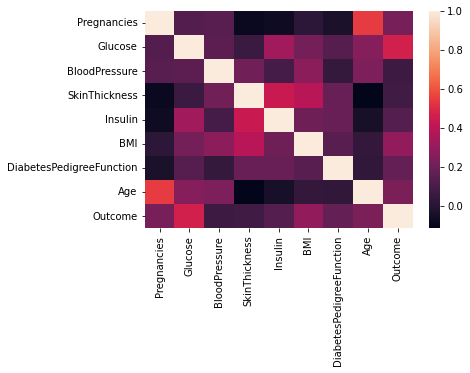

In [ ]:
sns.heatmap(gosal_df.corr())

<h3><p style="color:red"> (4) Add as many <u> code cells </u> as needed below to do the Regression Analysis work done in the first part of this notebook starting with Step(a) through Step(f). For this homework, please select and use any <u> FIVE variables </u> from the data frame, instead of the SEVEN used in the first part of this notebook. 
    
 </p></h3>

In [ ]:
features = ['Pregnancies', 'Glucose', 'Insulin','BMI', 'Age']

X = gosal_df[features]
y = gosal_df.Outcome

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

In [ ]:
x_train.shape, y_train.shape

((576, 5), (576,))

In [ ]:
x_test.shape, y_test.shape

((192, 5), (192,))

In [ ]:
x_train.head()

,Pregnancies,Glucose,Insulin,BMI,Age
36,11,138,0,33.2,35
520,2,68,66,25.0,25
275,2,100,57,40.5,25
729,2,92,0,30.1,22
300,0,167,0,32.3,30


In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=200)

logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_predict = logmodel.predict(x_test)
logreg = LogisticRegression(max_iter=1000).fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       132
           1       0.65      0.57      0.61        60

    accuracy                           0.77       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.76      0.77      0.77       192



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[114  18]
 [ 26  34]]


<h3><p style="color:red"> (5) Add a Markdown (or Text) cell below this cell in which you should please write a brief formatted report describing the quality of the model by interpreting its accuracy  </p></h3>

Accuracy = (TP + TN) / (TN+FP+FN+TP) = 148/192 = 0.77 or 77%

TN + FP = 132 = Support

FN + TP = 60 = Support

The result of the matrix is a model with 77% accuracy and is correctly classified in 77% of observations. While only having 5 features being tested and having a result of 77% accuracy rate, the model should be trusted and is good quality.